In [1]:
# Test notebook for multigroup Legendre coefficient plotting functions
# This notebook demonstrates the new plotting capabilities for MGMF34CovMat objects

import numpy as np
import matplotlib.pyplot as plt
from mcnpy.endf.read_endf import read_endf
from mcnpy.cov.multigroup.mg_mf34_covmat import MGMF34CovMat
from mcnpy.cov.multigroup.MF34_to_MG import MF34_to_MG
from mcnpy.cov.multigroup.plotting_mg import (
    plot_mg_legendre_coefficients, 
    plot_mg_vs_endf_comparison,
)
from mcnpy.energy_grids import SCALE56, SCALE252

print("Imported all required modules successfully!")
print("Testing multigroup Legendre coefficient plotting functions")

Imported all required modules successfully!
Testing multigroup Legendre coefficient plotting functions


In [2]:
# Reload the plotting module to get the fixes
import importlib
from mcnpy.cov.multigroup import plotting_mg
importlib.reload(plotting_mg)

# Re-import the functions
from mcnpy.cov.multigroup.plotting_mg import (
    plot_mg_legendre_coefficients, 
    plot_mg_vs_endf_comparison)

print("Plotting module reloaded successfully!")

Plotting module reloaded successfully!


In [ ]:
# Load the same ENDF file used in test_mf34cov.ipynb
jeff_Fe56 = '/share_snc/snc/JuanMonleon/jeff40_with_MF4_from_jeff33/26-Fe-56g.txt'
#jeff_Fe56 = '/soft_snc/lib/endf/jeff40/neutrons/13-Al-26g.txt'
jeff_endf = read_endf(jeff_Fe56)

zaid = 13026

print("ENDF file loaded successfully!")
print(f"Available MF sections: {list(jeff_endf.mf.keys())}")
print(f"Available MT reactions in MF4: {list(jeff_endf.mf[4].mt.keys())}")
print(f"Available MT reactions in MF34: {list(jeff_endf.mf[34].mt.keys())}")

ENDF file loaded successfully!
Available MF sections: [1, 4, 34]
Available MT reactions in MF4: [2, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
Available MT reactions in MF34: [2]


/home/MONLEON-JUAN/MCNPy/mcnpy/endf/parsers/parse_endf.py:90: UserWarning: Skipping MF sections without parsers: [2, 3, 6, 8, 10, 12, 14, 32, 33, 40]. Only parsing: [1, 4, 34]
  warnings.warn(f"Skipping MF sections without parsers: {skipped_mfs}. Only parsing: {parseable_mfs}")


In [4]:
# Create multigroup covariance data using SCALE 56-group structure
SCALE56_eV = [e * 1e6 for e in SCALE56]  # Convert to eV

print("Creating multigroup covariance data...")
mg_cov = MF34_to_MG(
    endf_object=jeff_endf,
    energy_grid=SCALE56_eV,
    weighting_function="constant",
    isotope=zaid,  
    mt=2
)

print(f"Multigroup covariance object created!")
print(f"Number of energy groups: {mg_cov.num_groups}")
print(f"Number of matrices: {mg_cov.num_matrices}")
print(f"Available Legendre coefficients: {list(mg_cov.legendre_coefficients.keys())}")

Creating multigroup covariance data...
Multigroup covariance object created!
Number of energy groups: 56
Number of matrices: 21
Available Legendre coefficients: [(13026, 2, 1), (13026, 2, 2), (13026, 2, 3), (13026, 2, 4), (13026, 2, 5), (13026, 2, 6)]
Multigroup covariance object created!
Number of energy groups: 56
Number of matrices: 21
Available Legendre coefficients: [(13026, 2, 1), (13026, 2, 2), (13026, 2, 3), (13026, 2, 4), (13026, 2, 5), (13026, 2, 6)]


# Test 1: Basic Multigroup Legendre Coefficient Plot

This test demonstrates the basic plotting functionality for multigroup Legendre coefficients using the standalone function.

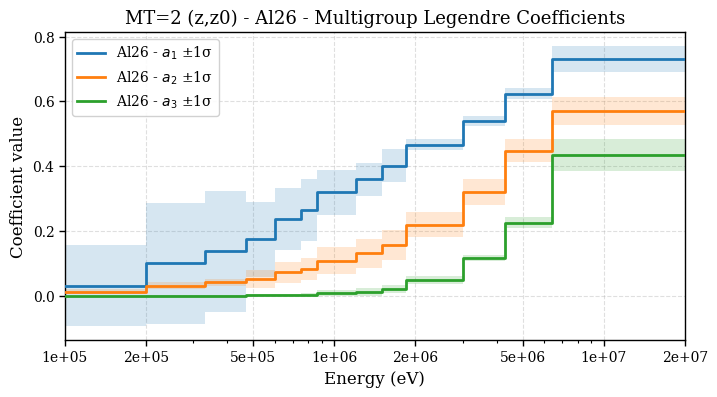

Updated multigroup plot (single dataset) created successfully!


In [5]:
# Test the standalone plotting function (updated with energy_range and multiple orders)
fig = plot_mg_legendre_coefficients(
    mg_covmat=mg_cov,
    isotope=zaid,
    mt=2,
    orders=[1,2,3],
    energy_range=(1e5, 2e7),
    figsize=(12, 6),
    include_uncertainties=True,
    marker=False
)

plt.show()
print("Updated multigroup plot (single dataset) created successfully!")

# Test 2: Using Convenience Methods

Test the plotting methods built into the MGMF34CovMat class.

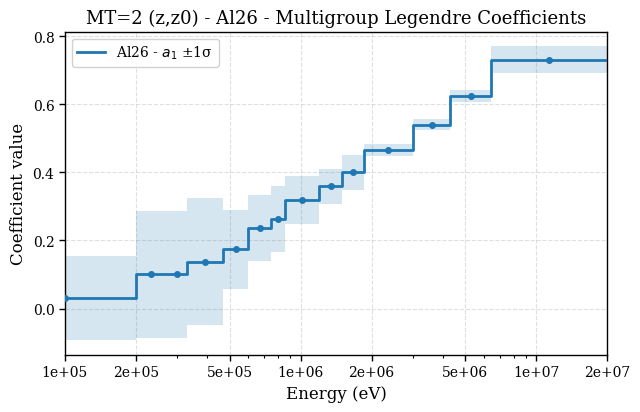

Convenience method plot created successfully!


In [6]:
# Test the convenience method on the MGMF34CovMat object
fig = mg_cov.plot_legendre_coefficients(
    isotope=zaid,
    mt=2,
    orders=[1],  # Just first two orders for cleaner plot
    figsize=(10, 6),
    marker=True,
    energy_range=(1e5, 2e7),
    include_uncertainties=True  # Disable uncertainties for cleaner view
)

plt.show()
print("Convenience method plot created successfully!")

# Test 3: Comparison with Continuous ENDF Data

This test demonstrates the comparison plotting functionality, showing both multigroup averaged coefficients and the continuous ENDF data.

# Test comparison plotting function
fig = plot_mg_vs_continuous_comparison(
    mg_covmat=mg_cov,
    endf=jeff_endf,
    isotope=26056,
    mt=2,
    orders=[3],  # Compare first two orders
    energy_range=(1e5, 2e7),  # Focus on a specific energy range
    figsize=(14, 8),
    mg_marker=False,
    continuous_line=True,
    include_uncertainties=True, 
    continuous_native=False,
)

plt.show()
print("Comparison plot created successfully!")

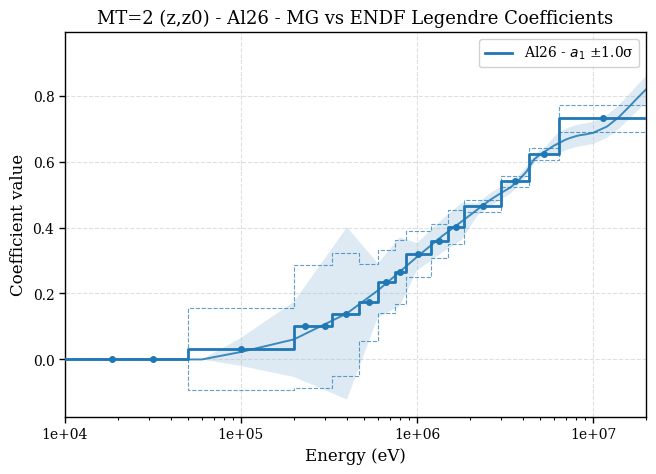

Convenience comparison method works!


In [7]:
# Also test the convenience method for comparison
fig = mg_cov.plot_vs_endf(
    endf=jeff_endf,
    isotope=zaid,
    mt=2,
    orders=[1],  # Just L=1 for cleaner visualization
    energy_range=(1e4, 2e7),  # Zoom in on interesting range
    #figsize=(12, 6),
    include_uncertainties=True,
)

plt.show()
print("Convenience comparison method works!")

In [8]:
# Test the legend fix and reload plotting module
import importlib
from mcnpy.cov.multigroup import plotting_mg
importlib.reload(plotting_mg)

# Re-import the updated functions
from mcnpy.cov.multigroup.plotting_mg import plot_mg_vs_endf_comparison

print("Plotting module reloaded with legend fix!")

Plotting module reloaded with legend fix!


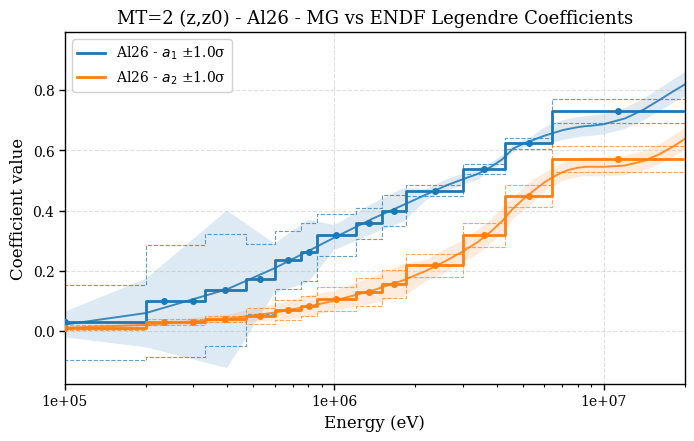

Updated plot with simplified legend - one entry per order!


In [9]:
# Test the updated plot with simplified legend (only one entry per order)
fig = plot_mg_vs_endf_comparison(
    mg_covmat=mg_cov,
    endf=jeff_endf,
    isotope=zaid,
    mt=2,
    orders=[1, 2],  # Test multiple orders
    energy_range=(1e5, 2e7),
    figsize=(14, 8),
    mg_marker=True,
    include_uncertainties=True,
    uncertainty_sigma=1.0,
    endf_native=False,
)

plt.show()
print("Updated plot with simplified legend - one entry per order!")

Reloaded plotting module with MF34-consistent styling!


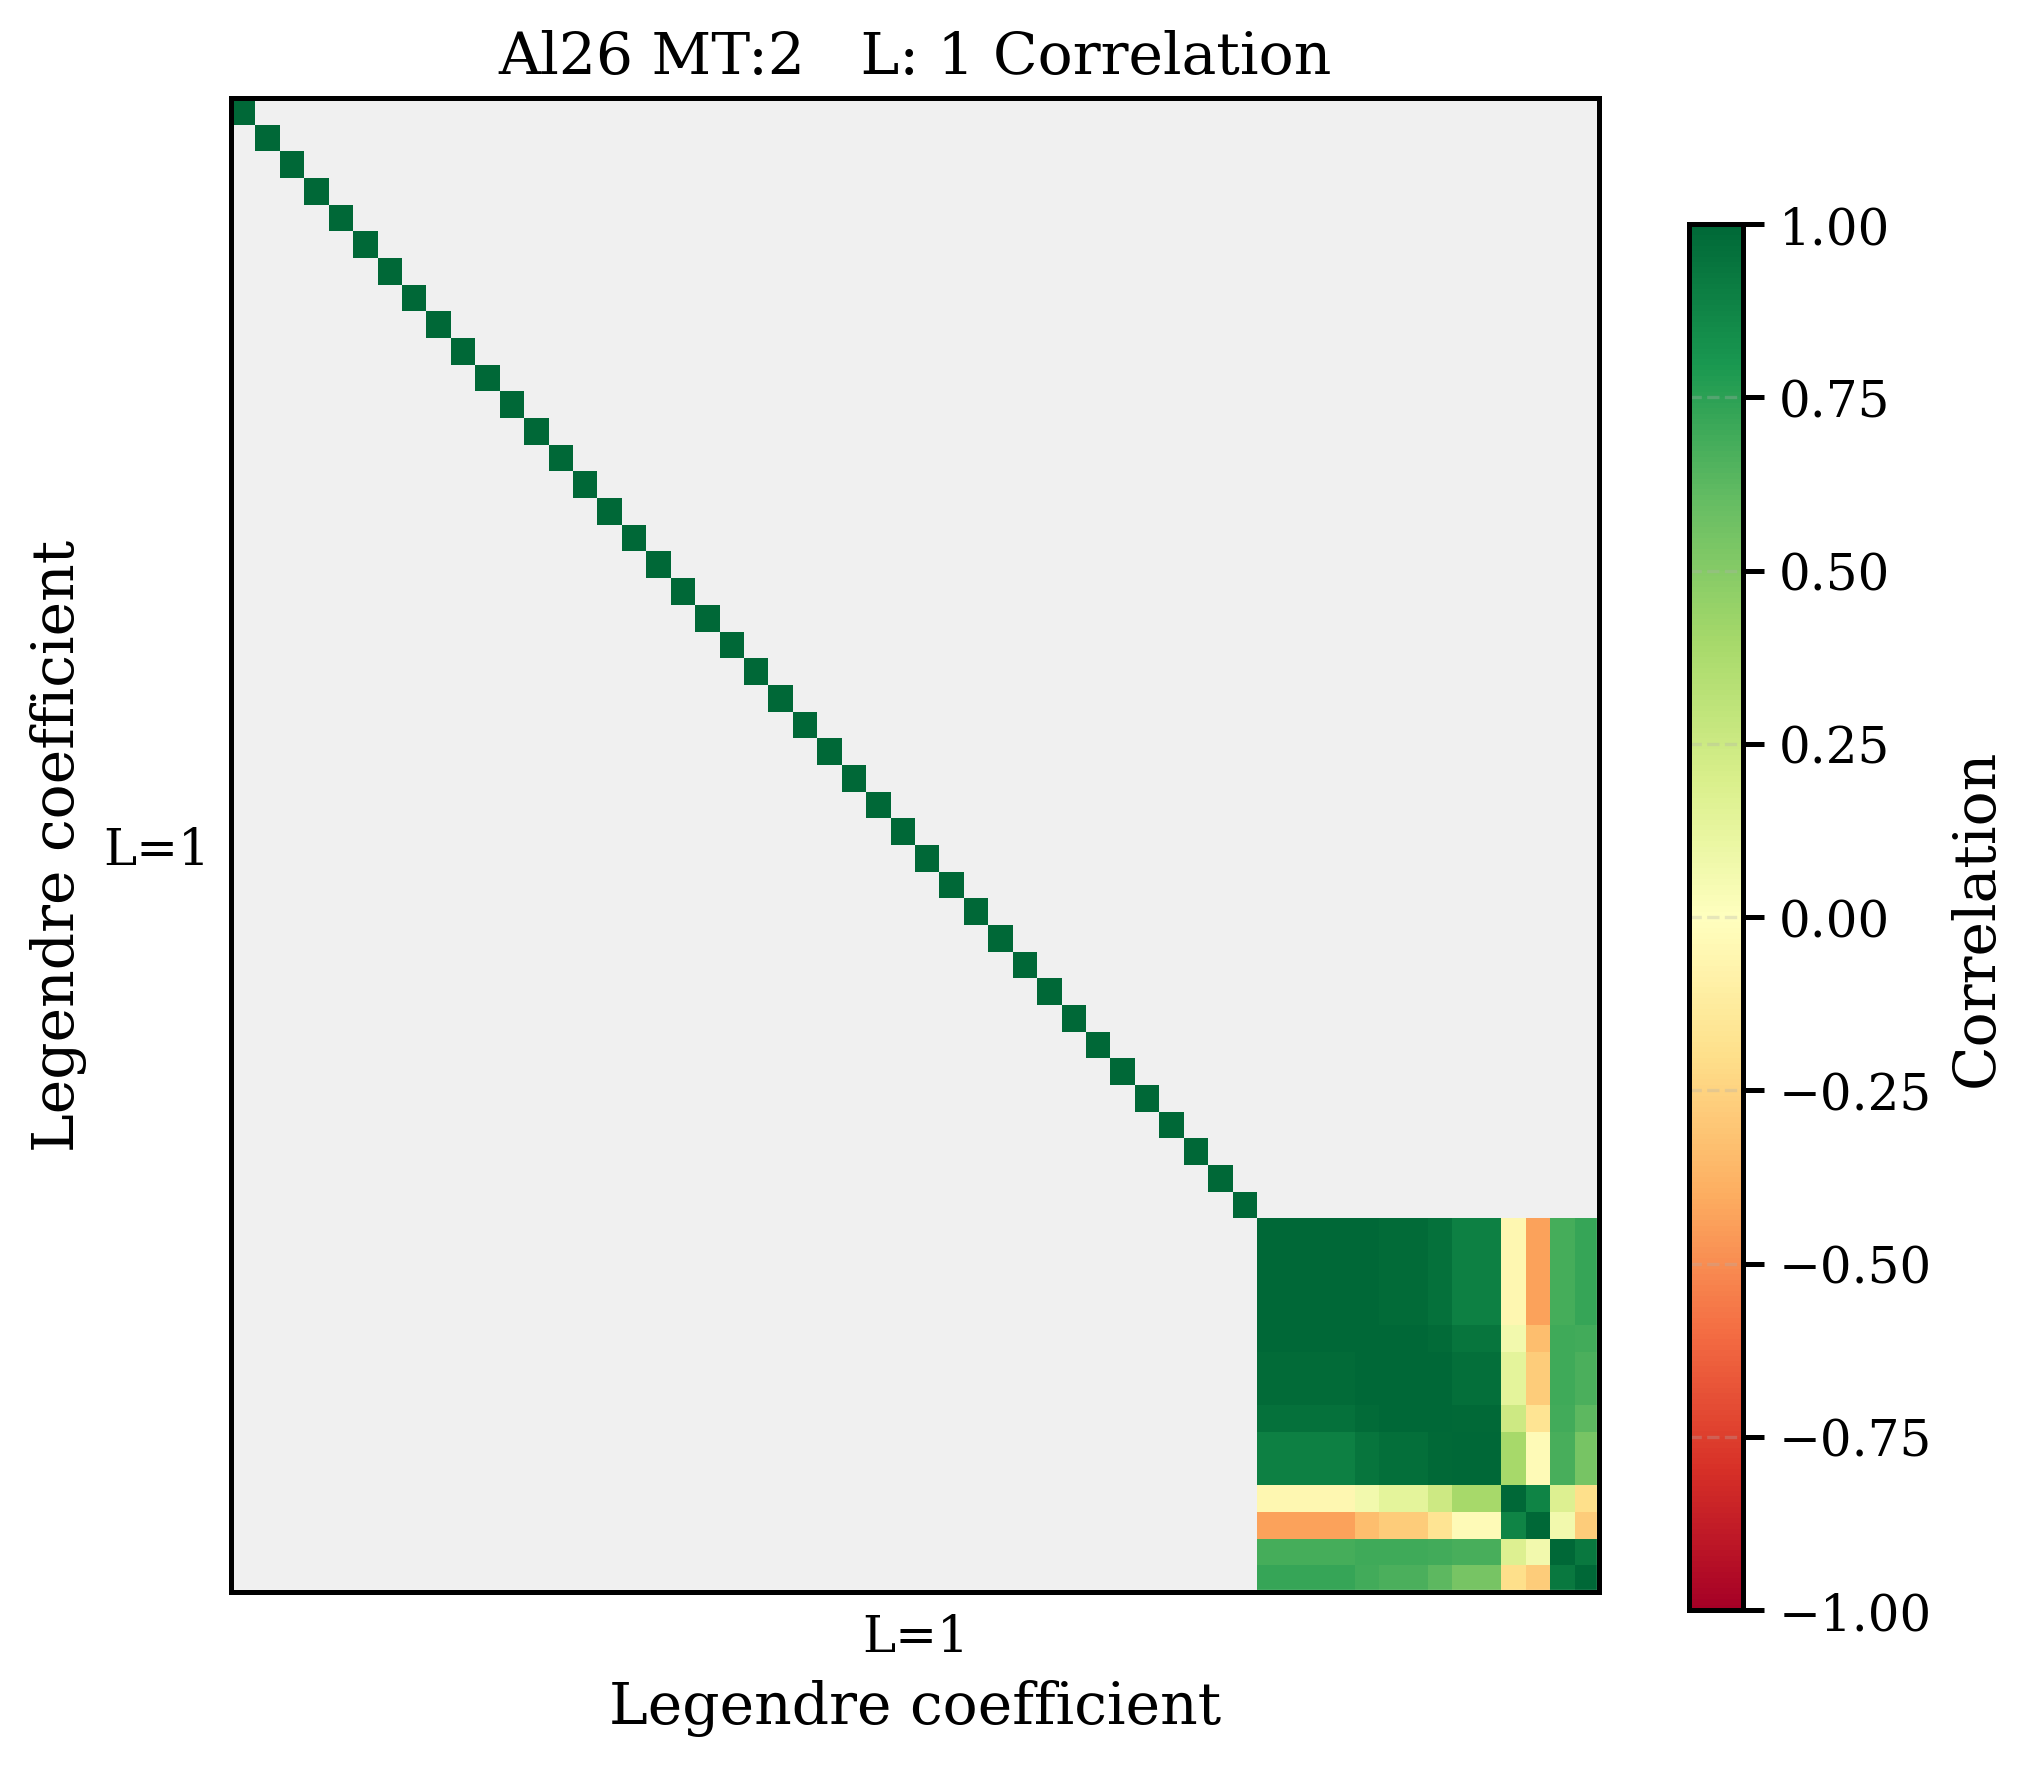

In [10]:
# Test updated heatmap function with MF34-consistent styling
import importlib
import mcnpy.cov.multigroup.plotting_mg
importlib.reload(mcnpy.cov.multigroup.plotting_mg)
from mcnpy.cov.multigroup.plotting_mg import plot_mg_covariance_heatmap

print("Reloaded plotting module with MF34-consistent styling!")

# Test 1: Correlation matrix with updated styling (no energy axes, MF34 background)
fig = plot_mg_covariance_heatmap(
    mg_covmat=mg_cov,
    isotope=13026, 
    mt=2, 
    orders=[1],
    matrix_type='corr',  
    covariance_type='rel',
    figsize=(6, 6)  # Same as MF34 default
)
plt.show()